In [1]:
import os
import glob
import numpy as np
import pandas as pd
import csv

In [2]:
#等距抽样
def dataSample(data,sample_count):
    record_count=data.shape[0]
    width=int(record_count/sample_count)#计算抽样间距
    data_sample=[]
    n=0
    for i in range(record_count-1):
        if i%width==0:
            data_sample.append(data.iloc[[i]])
            n +=1
        if  n==sample_count:
            break
        
    data_sample = np.array(data_sample)
    return data_sample

In [3]:
#等距抽样
def dataSample2(data,sample_count):
    record_count=data.shape[0]
    width=int(record_count/sample_count)#计算抽样间距
    data_sample=[]
    n=0
    for i in range(record_count-1):
        if i%width==0:
            data_sample.append(data[i])
            n +=1
        if  n==sample_count:
            break
        
    data_sample = np.array(data_sample)
    return data_sample

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score

In [5]:
def dfcombine(dfh, dfp, df, label,sample_count):
    df = df 
    label = label


    image_df_health = np.load(dfh)
    image_df_pain = np.load(dfp)
    print('orginal data')
    print(image_df_health.shape)
    print(image_df_pain.shape)
    print('\n')

    image_df_health = dataSample2(image_df_health,sample_count)
    image_df_pain = dataSample2(image_df_pain,sample_count)
    print('smaple data')
    print(image_df_health.shape)
    print(image_df_pain.shape)
    print('\n')

    labelH=[]
    labelP=[]
    for i in range(image_df_health.shape[0]):
        labelH=np.append(labelH,[0,1],axis=0)
        labelP=np.append(labelP,[1,0],axis=0)
    labelH=np.reshape(labelH,(-1,2))
    labelP=np.reshape(labelP,(-1,2))
    print('label')
    print(labelH.shape)
    print(labelP.shape)
    print('\n')

    image_df_health=np.append(image_df_health,image_df_pain,axis=0)
    labelH=np.append(labelH,labelP,axis=0)

    if np.array_equal(df,[]) :
        df = image_df_health
        label=labelH
    else:
        df =np.append(df, image_df_health,axis=0)
        label=np.append(label, labelH,axis=0)



    return df,label

In [6]:
df = []
label = []

df, label = dfcombine(r'B/health_image_dataset.npy',r'B/pain_image_dataset.npy',df, label,350)
df, label = dfcombine(r'KT/health_image_dataset.npy',r'KT/pain_image_dataset.npy',df, label,350)
df, label = dfcombine(r'MS/health_image_dataset.npy',r'MS/pain_image_dataset.npy',df, label,350)
df, label = dfcombine(r'SW_line/health_image_dataset.npy',r'SW_line/pain_image_dataset.npy',df, label,350)
df, label = dfcombine(r'SW_smooth/health_image_dataset.npy',r'SW_smooth/pain_image_dataset.npy',df, label,350)
df, label = dfcombine(r'TW/health_image_dataset.npy',r'TW/pain_image_dataset.npy',df, label,350)


orginal data
(5503, 128, 128, 3)
(4761, 128, 128, 3)


smaple data
(350, 128, 128, 3)
(350, 128, 128, 3)


label
(350, 2)
(350, 2)


orginal data
(1457, 128, 128, 3)
(7240, 128, 128, 3)


smaple data
(350, 128, 128, 3)
(350, 128, 128, 3)


label
(350, 2)
(350, 2)


orginal data
(7338, 128, 128, 3)
(8733, 128, 128, 3)


smaple data
(350, 128, 128, 3)
(350, 128, 128, 3)


label
(350, 2)
(350, 2)


orginal data
(7555, 128, 128, 3)
(7872, 128, 128, 3)


smaple data
(350, 128, 128, 3)
(350, 128, 128, 3)


label
(350, 2)
(350, 2)


orginal data
(4117, 128, 128, 3)
(7653, 128, 128, 3)


smaple data
(350, 128, 128, 3)
(350, 128, 128, 3)


label
(350, 2)
(350, 2)


orginal data
(5219, 128, 128, 3)
(4963, 128, 128, 3)


smaple data
(350, 128, 128, 3)
(350, 128, 128, 3)


label
(350, 2)
(350, 2)




In [7]:
print(df.shape)
print(label.shape)

(4200, 128, 128, 3)
(4200, 2)


In [8]:
def dfcombine2(sitaH,sitaP,df,sample_count):
    df=df
    dfh = pd.read_csv(sitaH)
    dfp = pd.read_csv(sitaP)

    print('orginal data')
    print(dfh.shape)
    print(dfp.shape)

    dfh=dfh.drop(labels=['frame'],axis=1)
    dfh=dataSample(dfh,sample_count)
    dfp=dfp.drop(labels=['frame'],axis=1)
    dfp=dataSample(dfp,sample_count)

    print('smaple data')
    print(dfh.shape)
    print(dfp.shape)

    df.append([dfh])
    df.append([dfp])
    return df

In [9]:
df_sita=[]
df_sita=dfcombine2(r'B/sitaHealth.csv',r'B/sitaPain.csv',df_sita,350)
df_sita=dfcombine2(r'KT/sitaHealth.csv',r'KT/sitaPain.csv',df_sita,350)
df_sita=dfcombine2(r'MS/sitaHealth.csv',r'MS/sitaPain.csv',df_sita,350)
df_sita=dfcombine2(r'SW_line/sitaHealth.csv',r'SW_line/sitaPain.csv',df_sita,350)
df_sita=dfcombine2(r'SW_smooth/sitaHealth.csv',r'SW_smooth/sitaPain.csv',df_sita,350)
df_sita=dfcombine2(r'TW/sitaHealth.csv',r'TW/sitaPain.csv',df_sita,350)
df_sita=np.array(df_sita)
df_sita=df_sita.reshape(-1,15)

print('df_sita')
print(df_sita.shape)
df_sita=pd.DataFrame(df_sita)
df_sita

orginal data
(5503, 16)
(4761, 16)
smaple data
(350, 1, 15)
(350, 1, 15)
orginal data
(1457, 16)
(7240, 16)
smaple data
(350, 1, 15)
(350, 1, 15)
orginal data
(7338, 16)
(8733, 16)
smaple data
(350, 1, 15)
(350, 1, 15)
orginal data
(7555, 16)
(7872, 16)
smaple data
(350, 1, 15)
(350, 1, 15)
orginal data
(4117, 16)
(7653, 16)
smaple data
(350, 1, 15)
(350, 1, 15)
orginal data
(5219, 16)
(4963, 16)
smaple data
(350, 1, 15)
(350, 1, 15)
df_sita
(4200, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,36.498051,79.149447,64.352502,17.171511,128.753684,34.074804,69.184814,64.945033,45.870153,30.277698,34.407984,115.314319,49.604237,51.579495,78.816268
1,26.117217,59.560022,94.322761,24.882440,102.439892,52.677668,53.068137,86.553258,40.378604,41.645093,56.626140,81.728767,42.879870,81.508580,55.611550
2,33.212402,70.226085,76.561513,19.060416,121.302772,39.636812,68.633704,65.632096,45.734200,36.924701,39.704560,103.370739,51.076687,58.764976,70.158337
3,27.461348,51.025098,101.513554,27.884503,101.848415,50.267082,57.669395,87.207349,35.123256,51.246472,51.725556,77.027972,50.823317,79.610059,49.566624
4,29.022072,57.990936,92.986992,23.888187,104.236163,51.875651,85.480987,58.202519,36.316494,41.111341,46.866980,92.021679,46.245227,70.755166,62.999607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,34.979733,42.026269,102.993998,44.287579,92.888773,42.823649,79.515023,79.772644,20.712333,60.170349,50.020700,69.808951,50.862504,94.308278,34.829218
4196,34.193825,42.408194,103.397981,44.090838,92.558115,43.351047,79.120631,79.992358,20.887010,60.046934,51.178963,68.774103,50.149921,95.269801,34.580278
4197,34.775106,41.505307,103.719587,44.055830,92.834719,43.109451,77.569328,82.389387,20.041285,60.610136,49.450257,69.939607,51.329412,93.506088,35.164501
4198,33.727211,42.427599,103.845189,43.928071,91.977749,44.094180,75.519666,83.735295,20.745039,59.751010,51.716309,68.532682,49.550149,95.644380,34.805470


In [10]:
image_df_health=df[label[:,0]==0]
image_df_pain=df[label[:,0]==1]
labelH=label[label[:,0]==0]
labelP=label[label[:,0]==1]

random_state=42
A_train, A_test, b_train, b_test = train_test_split(image_df_health, labelH, test_size=20/42, random_state=random_state)
A_validation, A_test, b_validation, b_test = train_test_split(A_test, b_test, test_size=0.5, random_state=random_state)

W_train, W_test, v_train, v_test = train_test_split(image_df_pain, labelP, test_size=20/42, random_state=random_state)
W_validation, W_test, v_validation, v_test = train_test_split(W_test, v_test, test_size=0.5, random_state=random_state)

X_train=np.append(A_train, W_train,axis=0)
X_validation=np.append(A_validation, W_validation,axis=0)
X_test=np.append(A_test, W_test,axis=0)

y_train=np.append(b_train, v_train,axis=0)
y_validation=np.append(b_validation, v_validation,axis=0)
y_test=np.append(b_test, v_test,axis=0)

print('train')
print(X_train.shape)
print(y_train.shape)
print('validation')
print(X_validation.shape)
print(y_validation.shape)
print('test')
print(X_test.shape)
print(y_test.shape)


X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_validation  /=255
X_test  /=255

train
(2200, 128, 128, 3)
(2200, 2)
validation
(1000, 128, 128, 3)
(1000, 2)
test
(1000, 128, 128, 3)
(1000, 2)


In [12]:
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate,Dropout
from keras import applications

def model_InceptionV3(df):
    base_model = applications.InceptionV3(weights='imagenet', 
                                    include_top=False, 
                                    input_shape=(df.shape[1],df.shape[2],3))

    for layer in base_model.layers:
        layer.trainable = False

    add_model = Sequential()
    add_model.add(base_model)
    add_model.add(GlobalAveragePooling2D())
    add_model.add(Dropout(0.2))
    add_model.add(Dense(1024, activation='relu'))
    add_model.add(Dense(2, activation='softmax'))

    model = add_model

    #adam = optimizers.Adam(lr=1e-4)
    #model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    opt = optimizers.SGD(lr=1e-4, momentum=0.0, decay=0.0, nesterov=False)
    #opt = optimizers.RMSprop(lr=0.0001)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

    model.summary()
    return model


In [12]:
model=model_InceptionV3(X_train)


file_path="save/best_weights_ALL2.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early_stopping = EarlyStopping(monitor='val_accuracy',patience=3,min_delta=0.001) 
callbacks_list = [checkpoint, early_stopping]
history = model.fit(X_train, y_train,
          callbacks = callbacks_list,
          batch_size=100,
          epochs=40,
          verbose=1,
          validation_data=(X_validation, y_validation))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 23,903,010
Trainable params: 2,100,226
Non-trainable params: 21,802,784
_________________________________________________________________
Epoch 1/40
15/15 [==============================] - ETA: 0s - loss: 1.2407 - accuracy: 0.5033
Epoch 00

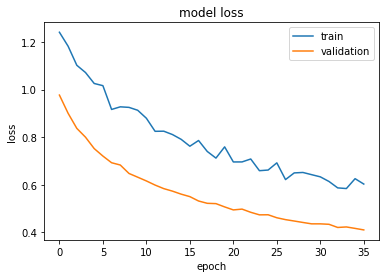

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()

In [13]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model=model_InceptionV3(X_train)
model.load_weights('save/best_weights_ALL2.hdf5')
pred = model.predict(X_test)[:,0] > 0.5
y_test_pain=y_test[:,0]

print(confusion_matrix(y_test[:,0],pred))
print(classification_report(y_test[:,0],pred))


print(pred[0:10])
print(y_test[0:10,1])

tT = 0
tF = 0
fT = 0
fF = 0
for i in range(len(y_test)):
    if (y_test_pain[i] == 0)&(pred[i] == 0):
            tT += 1
    elif (y_test_pain[i] == 0)&(pred[i] == 1):
            tF += 1
    elif (y_test_pain[i] == 1)&(pred[i] == 0):
            fT += 1
    elif (y_test_pain[i] == 1)&(pred[i] == 1):
            fF += 1
print(tT,tF,fT,fF)
        
##save result
file = 'result_NO.csv'
with open(file, 'a+', newline = '') as csvFile:
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow([tT,tF,fT,fF,'N_CNN'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 23,903,010
Trainable params: 2,100,226
Non-trainable params: 21,802,784
_________________________________________________________________
[[414  86]
 [ 87 413]]
              precision    recall  f1-score   support

         0.0       0.83 

In [14]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import joblib

def modelPredict2(df_sita,df,label,faceModel,ssModel,clf,file_path):    
    #載入正臉model
    face = joblib.load(faceModel)
    ssFace = joblib.load(ssModel)
    #輸入sita!!!!!!!

    df=df
    Sitadata = df_sita
    data = ssFace.transform(Sitadata)

    pred = face.predict(data)
    

    df=df[pred==1]
    label=label[pred==1]
    
    image_df_health=df[label[:,0]==0]
    image_df_pain=df[label[:,0]==1]
    labelH=label[label[:,0]==0]
    labelP=label[label[:,0]==1]


    if len(image_df_pain) >= len(image_df_health):
        image_df_pain = dataSample2(image_df_pain,image_df_health.shape[0])
        labelP = dataSample2(labelP,labelH.shape[0])
        print(image_df_pain.shape)
        print(image_df_health.shape)

    elif len(image_df_pain) < len(image_df_health):
        image_df_health = dataSample2(image_df_health,image_df_pain.shape[0])
        labelH = dataSample2(labelH,labelP.shape[0])
        print(image_df_pain.shape)
        print(image_df_health.shape)    
    
    
    random_state=42
    A_train, A_test, b_train, b_test = train_test_split(image_df_health, labelH, test_size=20/42, random_state=random_state)
    A_validation, A_test, b_validation, b_test = train_test_split(A_test, b_test, test_size=0.5, random_state=random_state)

    W_train, W_test, v_train, v_test = train_test_split(image_df_pain, labelP, test_size=20/42, random_state=random_state)
    W_validation, W_test, v_validation, v_test = train_test_split(W_test, v_test, test_size=0.5, random_state=random_state)

    X_train=np.append(A_train, W_train,axis=0)
    X_validation=np.append(A_validation, W_validation,axis=0)
    X_test=np.append(A_test, W_test,axis=0)

    y_train=np.append(b_train, v_train,axis=0)
    y_validation=np.append(b_validation, v_validation,axis=0)
    y_test=np.append(b_test, v_test,axis=0)

    print('train')
    print(X_train.shape)
    print(y_train.shape)
    print('validation')
    print(X_validation.shape)
    print(y_validation.shape)
    print('test')
    print(X_test.shape)
    print(y_test.shape)


    X_train = X_train.astype('float32')
    X_validation = X_validation.astype('float32')
    X_test = X_test.astype('float32')
    X_train /=255
    X_validation  /=255
    X_test  /=255
    
    #model 初始化
    model=model_InceptionV3(X_test)
    
    #confusion_matrix
    model.load_weights(file_path)
    pred = model.predict(X_test)[:,0] > 0.5
    y_test_pain=y_test[:,0]
    print(confusion_matrix(y_test_pain,pred))
    print(classification_report(y_test_pain,pred))


    tT = 0
    tF = 0
    fT = 0
    fF = 0
    for i in range(len(y_test)):
        if (y_test_pain[i] == 0)&(pred[i] == 0):
                tT += 1
        elif (y_test_pain[i] == 0)&(pred[i] == 1):
                tF += 1
        elif (y_test_pain[i] == 1)&(pred[i] == 0):
                fT += 1
        elif (y_test_pain[i] == 1)&(pred[i] == 1):
                fF += 1
    print(tT,tF,fT,fF)
        
    ##save result
    file = 'result_NO.csv'
    with open(file, 'a+', newline = '') as csvFile:
        csvWriter = csv.writer(csvFile)
        csvWriter.writerow([tT,tF,fT,fF,clf])

In [15]:
print('svm_line')
modelPredict2(df_sita,df,label,'save/FaceModel_SVMLinear2.pkl','save/ssFace2.pkl','save/Linear','save/best_weights_ALL2.hdf5')

svm_line
(646, 128, 128, 3)
(646, 128, 128, 3)
train
(676, 128, 128, 3)
(676, 2)
validation
(308, 128, 128, 3)
(308, 2)
test
(308, 128, 128, 3)
(308, 2)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2050      
Total params: 23,903,010
Trainable params: 2,100,226
Non-trainable params: 21,802,784
_____________

In [16]:
print('svm')
modelPredict2(df_sita,df,label,'save/FaceModel_SVM2.pkl','save/ssFace2.pkl','save/SVM','save/best_weights_ALL2.hdf5')

svm
(1058, 128, 128, 3)
(1058, 128, 128, 3)
train
(1108, 128, 128, 3)
(1108, 2)
validation
(504, 128, 128, 3)
(504, 2)
test
(504, 128, 128, 3)
(504, 2)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 2050      
Total params: 23,903,010
Trainable params: 2,100,226
Non-trainable params: 21,802,784
______________

In [17]:
print('rfc')
modelPredict2(df_sita,df,label,'save/FaceModel_RFC2.pkl','save/ssFace2.pkl','save/RFC','save/best_weights_ALL2.hdf5')

rfc
(1166, 128, 128, 3)
(1166, 128, 128, 3)
train
(1220, 128, 128, 3)
(1220, 2)
validation
(556, 128, 128, 3)
(556, 2)
test
(556, 128, 128, 3)
(556, 2)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 2050      
Total params: 23,903,010
Trainable params: 2,100,226
Non-trainable params: 21,802,784
______________